In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [86]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [87]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
13453      0       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
13453       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
13453         0         0         0         0         0  

[1 rows x 785 columns]

In [88]:
df.shape

(42000, 785)

In [89]:
import matplotlib.pyplot as plt

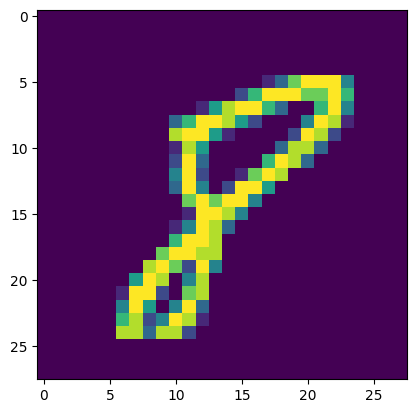

In [90]:
# to check how a particular datapoint looks like(here an image)
plt.imshow(df.iloc[18306, 1:].values.reshape(28,28))

In [91]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn = KNeighborsClassifier()

In [95]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
# To See how much time it takes for KNN algo, it will be large due to high dimensioanlity(784)(28*28)

import time
st = time.time()
y_pred = knn.predict(X_test)
print(time.time() - st)

12.209758520126343


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [97]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = 100)

In [99]:
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [100]:
X_train_trf.shape

(33600, 100)

In [101]:
knn = KNeighborsClassifier()

knn.fit(X_train_trf, y_train)
y_pred = knn.predict(X_test_trf)

accuracy_score(y_test, y_pred)

0.9533333333333334

See how the Accuracy is only affected by one percent after reducing the dimensions from 784 to 100

### Now lets see how the Accuracy changes with the number of Components

In [103]:
for i in range(1, 785, 25):
    pca = PCA(n_components = i)

    X_train_trf = pca.fit_transform(X_train_scaled)
    X_test_trf = pca.transform(X_test_scaled)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)

    print(f"Accuracy score for {i} components is: ", accuracy_score(y_test, y_pred))

Accuracy score for 1 components is:  0.25857142857142856
Accuracy score for 26 components is:  0.9480952380952381
Accuracy score for 51 components is:  0.9533333333333334
Accuracy score for 76 components is:  0.9536904761904762
Accuracy score for 101 components is:  0.9527380952380953
Accuracy score for 126 components is:  0.9526190476190476
Accuracy score for 151 components is:  0.9508333333333333
Accuracy score for 176 components is:  0.9513095238095238
Accuracy score for 201 components is:  0.9508333333333333
Accuracy score for 226 components is:  0.949047619047619
Accuracy score for 251 components is:  0.9477380952380953
Accuracy score for 276 components is:  0.9471428571428572
Accuracy score for 301 components is:  0.9470238095238095
Accuracy score for 326 components is:  0.945595238095238
Accuracy score for 351 components is:  0.9446428571428571
Accuracy score for 376 components is:  0.9436904761904762
Accuracy score for 401 components is:  0.9434523809523809
Accuracy score for 4

In [107]:
for i in range(776, 785, 1):
    pca = PCA(n_components = i)

    X_train_trf = pca.fit_transform(X_train_scaled)
    X_test_trf = pca.transform(X_test_scaled)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)

    print(f"Accuracy score for {i} components is: ", accuracy_score(y_test, y_pred))

Accuracy score for 776 components is:  0.9391666666666667
Accuracy score for 777 components is:  0.9391666666666667
Accuracy score for 778 components is:  0.9391666666666667
Accuracy score for 779 components is:  0.9391666666666667
Accuracy score for 780 components is:  0.9391666666666667
Accuracy score for 781 components is:  0.9391666666666667
Accuracy score for 782 components is:  0.9391666666666667
Accuracy score for 783 components is:  0.9391666666666667
Accuracy score for 784 components is:  0.9391666666666667


This is because PCA is a lossy Algorithm and Sensitivity of KNN, and few other factors.

In [108]:
pca = PCA()

X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

knn = KNeighborsClassifier()
knn.fit(X_train_trf, y_train)
y_pred = knn.predict(X_test_trf)

print(f"Accuracy score for all the components is: ", accuracy_score(y_test, y_pred))

Accuracy score for all the components is:  0.9391666666666667


### Now lets work on the Visualisation in 2D and 3D

In [105]:
pca = PCA(n_components = 2)

X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x = X_train_trf[:, 0],
                y = X_train_trf[:, 1],
                 color = y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.show()

In [110]:
pca = PCA(n_components = 3)

X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:, 0], y = X_train_trf[:,1], z = X_train_trf[:,2],
                   color = y_train_trf)
fig.update_layout(
    margin = dict(l=20, r=20, t=20, b=20)
)

fig.show()

We can play around with the above visualisation. Note how similary looking digits(like 3 and 8) have a significant overlap.

In [113]:
# Eigen Values
print(pca.explained_variance_)

# Eigen Vectors
print(pca.components_.shape)

[40.67111198 29.17023383 26.74459615]
(3, 784)


### How To find the optimal number of PC(principal components) required

Note that the Eigen values signify the amount of variance corresponding eigen vector explains, and we need to explain atleast 90% of the Variance.

In [115]:
pca.explained_variance_ratio_ # note that it is from the 3D visualisation, so 3 PC

array([0.05785192, 0.0414927 , 0.03804239])

So lets redo with no components restrictions and put the above theory into practise.

In [118]:
pca = PCA(n_components = None)

X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)


In [119]:
pca.explained_variance_.shape

(784,)

In [120]:
pca.components_.shape

(784, 784)

In [130]:
np.cumsum(np.sort(pca.explained_variance_ratio_)[::-1])*100

array([  5.78519225,   9.93446193,  13.73870094,  16.70496371,
        19.2865254 ,  21.54150558,  23.5145736 ,  25.28985357,
        26.85850424,  28.29456752,  29.66482235,  30.89207736,
        32.03898935,  33.16201674,  34.22054559,  35.24047664,
        36.1981528 ,  37.14086161,  38.05335104,  38.94352123,
        39.78346173,  40.60352492,  41.38882815,  42.14556786,
        42.88282888,  43.58471353,  44.28263326,  44.95373775,
        45.59358278,  46.22392007,  46.83927092,  47.44165957,
        48.02533355,  48.6038813 ,  49.17621445,  49.72261423,
        50.2658216 ,  50.79399435,  51.30737609,  51.80139157,
        52.28906267,  52.77104144,  53.23924587,  53.69858836,
        54.15624919,  54.60546821,  55.05015043,  55.49169118,
        55.92680312,  56.35883605,  56.78064492,  57.19888804,
        57.60688239,  58.00888731,  58.40722316,  58.80182197,
        59.18869358,  59.57188877,  59.94844139,  60.32263485,
        60.68748701,  61.04828955,  61.402176  ,  61.75

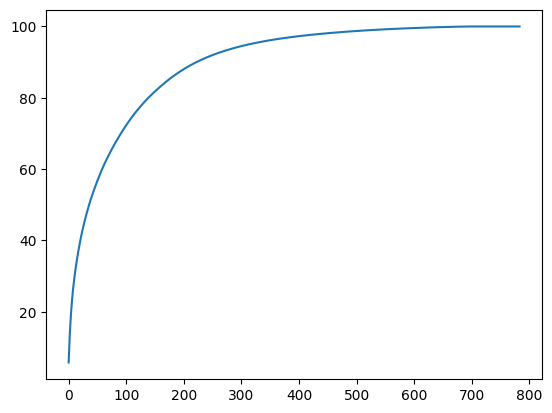

In [132]:
plt.plot(np.cumsum(np.sort(pca.explained_variance_ratio_)[::-1])*100)

We can now use this graph to find where we are close to 90

## When to Not use PCA

Like Uniform circular/Spherical distribution.
When there is a specific pattern.